In [1]:
import pandas as pd
import nltk
import typing
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jackm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jackm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Read in data here
location_name = "Palermo"
text_data = pd.read_excel('C:\\Users\\jackm\\Documents\\COVID-CrowdFight\\data\\200514 - Jack\\Translated-Palermo.xlsx')
display(text_data.sample(5))

,Unnamed: 0,SearchKeywords,SearchCity,Time_Zone,tweet_ID,created_at,created_at_local,full_text,favorite_count,retweet_count,...,Geo,Coordinates,Checked_In_Place,User_Location,RT_id,RT_Geo,RT_Coordinates,RT_Place,RT_User_Location,translated_full_text
26699,26699,razzismo OR Codogno OR COVID19italia OR Lombar...,Palermo,1.0,1.242890e+18,2020-03-25 19:03:53,2020-03-25 20:03:53,RT @ChiarsXo: Io ve la butto: Michele che cant...,0.0,7.0,...,NaN,NaN,None,Fandom Dei Pali,1242861076171140096,NaN,NaN,NaN,"Palermo, Italy.",RT @ChiarsXo: I'll throw it to you: Michele si...
26375,26375,racism OR COVID-19 OR COVID2019 OR Lombardy OR...,Palermo,1.0,1.242754e+18,2020-03-25 10:01:39,2020-03-25 11:01:39,"#Coronavirus e privacy, #Bernardi: ""S√¨ ad ini...",0.0,0.0,...,NaN,NaN,None,Palermo,None,None,None,None,None,"#Coronavirus and privacy, #Bernardi: ""https://..."
24443,24443,racism OR COVID-19 OR COVID2019 OR Lombardy OR...,Palermo,1.0,1.242510e+18,2020-03-24 17:56:01,2020-03-24 18:56:01,RT @e_terranova: In #Spagna hanno scoperto che...,0.0,480.0,...,NaN,NaN,None,NaN,1242368129273139968,NaN,NaN,NaN,Palermo,Error
41194,41194,racism OR COVID-19 OR COVID2019 OR Lombardy OR...,Palermo,1.0,1.248499e+18,2020-04-10 06:32:49,2020-04-10 07:32:49,Coronavirus. Sospesa ordinanza per transito su...,0.0,0.0,...,NaN,NaN,None,Palermo,None,None,None,None,None,Coronavirus. Suspended order for transit over ...
41598,41598,racism OR COVID-19 OR COVID2019 OR Lombardy OR...,Palermo,1.0,1.248982e+18,2020-04-11 14:31:33,2020-04-11 15:31:33,"Macellaio di Ragusa positivo al covid, il sind...",0.0,0.0,...,NaN,NaN,None,Palermo,None,None,None,None,None,"Butcher of Ragusa positive to covid, the mayor..."


In [3]:
# Import english stop words

from nltk.corpus import stopwords
stopcorpus: typing.List = stopwords.words('english')
print(stopcorpus)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
# Convert to lowercase, and remove stop words

def style_text(text:str):
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    return [item for item in text_data if item not in list_of_words_to_remove]

text_data['cleaned_text'] = text_data['translated_full_text'].astype(str).apply(style_text)

text_data['cleaned_text'] = text_data['translated_full_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

def collapse_list_to_string(string_list):
    return ' '.join(string_list)

text_data['cleaned_text'] = text_data['cleaned_text'].apply(collapse_list_to_string)

display(text_data['cleaned_text'].head(5))

0    Coronavirus: Sonia, famous Chinese restaurant ...
1    @sarregoeswest @SpudFNVPN https://t.co/DQorjEs...
2    The Unknown Unknowns risk Coronavirus? Competi...
3    Coronavirus emergency. The mayor Modica taking...
4    @sarregoeswest @SpudFNVPN But know Shanghai re...
Name: cleaned_text, dtype: object

In [5]:
# Lemmatize cleaned text (stem words)

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

text_data['clean_lemmatized'] = text_data['cleaned_text'].astype(str).apply(lemmatize_text)

text_data['clean_lemmatized'] = text_data['clean_lemmatized'].apply(collapse_list_to_string)

display(text_data['clean_lemmatized'].head(5))

0    Coronavirus: Sonia, famous Chinese restaurant ...
1    @sarregoeswest @SpudFNVPN https://t.co/DQorjEs...
2    The Unknown Unknowns risk Coronavirus? Competi...
3    Coronavirus emergency. The mayor Modica taking...
4    @sarregoeswest @SpudFNVPN But know Shanghai re...
Name: clean_lemmatized, dtype: object

In [6]:
output_df = pd.DataFrame(text_data[['clean_lemmatized','full_text']].drop_duplicates())
display(output_df.head(5))

,clean_lemmatized,full_text
0,"Coronavirus: Sonia, famous Chinese restaurant ...","Coronavirus: chiude Sonia, il ristorante cines..."
1,@sarregoeswest @SpudFNVPN https://t.co/DQorjEs...,@sarregoeswest @SpudFNVPN https://t.co/DQorjEs...
2,The Unknown Unknowns risk Coronavirus? Competi...,I Soliti Ignoti a rischio per il Coronavirus? ...
3,Coronavirus emergency. The mayor Modica taking...,Emergenza Coronavirus. Il sindaco di Modica ad...
4,@sarregoeswest @SpudFNVPN But know Shanghai re...,@sarregoeswest @SpudFNVPN Ma che ne sai tu sei...


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_analyzer = SentimentIntensityAnalyzer()

In [8]:
def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

In [9]:
# Get Sentiment scores
output_df['Positive Sentiment Score'] = output_df['clean_lemmatized'].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
output_df['Negative Sentiment Score'] = output_df['clean_lemmatized'].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
output_df['Neutral Sentiment Score'] = output_df['clean_lemmatized'].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neu'))
output_df['Compound Sentiment Score'] = output_df['clean_lemmatized'].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'compound'))

display(output_df.head(5))

,clean_lemmatized,full_text,Positive Sentiment Score,Negative Sentiment Score,Neutral Sentiment Score,Compound Sentiment Score
0,"Coronavirus: Sonia, famous Chinese restaurant ...","Coronavirus: chiude Sonia, il ristorante cines...",0.0,0.000,1.000,0.0000
1,@sarregoeswest @SpudFNVPN https://t.co/DQorjEs...,@sarregoeswest @SpudFNVPN https://t.co/DQorjEs...,0.0,0.269,0.731,-0.8115
2,The Unknown Unknowns risk Coronavirus? Competi...,I Soliti Ignoti a rischio per il Coronavirus? ...,0.0,0.189,0.811,-0.2732
3,Coronavirus emergency. The mayor Modica taking...,Emergenza Coronavirus. Il sindaco di Modica ad...,0.0,0.224,0.776,-0.3818
4,@sarregoeswest @SpudFNVPN But know Shanghai re...,@sarregoeswest @SpudFNVPN Ma che ne sai tu sei...,0.0,0.103,0.897,-0.1531


In [10]:
output_df.to_excel(f'{location_name}-Sentiment.xlsx')

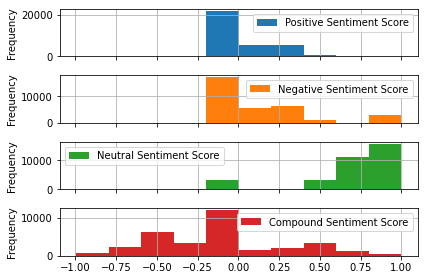

In [11]:
output_df.plot.hist(subplots=True,grid=True)
plt.tight_layout()
plt.savefig(f'{location_name}-sentiment-histograms.jpg')

(-0.5, 399.5, 199.5, -0.5)

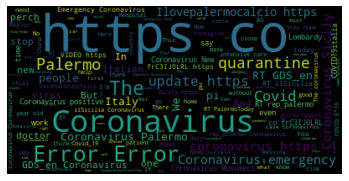

In [12]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(output_df['clean_lemmatized']))

plt.imshow(wordcloud, interpolation='bilinear')

plt.imsave(f'{location_name}-clean-wordcloud.jpg',wordcloud)
plt.axis("off")